# Using kerlab

In [5]:
list.of.packages <- c("kernlab","rgl")
new.packages <- list.of.packages[!(list.of.packages %in% installed.packages()[,"Package"])]
if(length(new.packages)) install.packages(new.packages, dependencies=TRUE)

library(kernlab)
library(rgl)


In [ ]:
plotlinearsvm <- function(svp, xtrain, ytrain){
  plot(xtrain, pch = ifelse(ytrain > 0, 1, 2), xlim = c(-2, 6), ylim = c(-3, 6))
  legend("topleft", c("Positive", "Negative"), pch = seq(2))
  w = colSums(unlist(alpha(svp)) * ytrain[unlist(alphaindex(svp))] * xtrain[unlist(alphaindex(svp)),])
  b = - b(svp) 
  print("W=")
  print(w)
  print("b=")
  print(b(svp))
  M=1/norm(w,type="2")
  print("M=")
  print(M)
  abline(a= -b / w[2], b = -w[1]/w[2])
  abline(a= (-b+1)/ w[2], b = -w[1]/w[2], lty = 2)
  abline(a= (-b-1)/ w[2], b = -w[1]/w[2], lty = 2)
}


computelinearsvm<- function(xtrain,ytrain, C1)
{
  
  svp <- ksvm(xtrain,ytrain,type="C-svc",kernel='vanilladot',C=C1,scaled=c())
  # General summary
  print(svp)
  # Attributes that you can access
  attributes(svp)
  # For example, the support vectors
  print(alpha(svp))
  print(alphaindex(svp))
  print(b(svp))
  plotlinearsvm(svp, xtrain, ytrain)
  
}


In [ ]:
n <- 150 # number of data points
p <- 2   # dimension
sigma <- 1  # variance of the distribution
meanpos <- 0 # centre of the distribution of positive examples
meanneg <- 3 # centre of the distribution of negative examples
npos <- round(n/2) # number of positive examples
nneg <- n-npos # number of negative examples
# Generate the positive and negative examples
xpos <- matrix(rnorm(npos*p,mean=meanpos,sd=sigma),npos,p)
xneg <- matrix(rnorm(nneg*p,mean=meanneg,sd=sigma),npos,p)
x <- rbind(xpos,xneg)
# Generate the labels
y <- matrix(c(rep(1,npos),rep(-1,nneg)))
# Visualize the data
plot(x,col=ifelse(y>0,1,2))
legend("topleft",c("Positive","Negative"),col=seq(2),pch=1,text.col=seq(2))


In [ ]:
## Prepare a training and a test set ##
ntrain <- round(n*0.8) # number of training examples
tindex <- sample(n,ntrain) # indices of training samples
xtrain <- x[tindex,]
xtest <- x[-tindex,]
ytrain <- y[tindex]

ytest <- y[-tindex]
istrain=rep(0,n)
istrain[tindex]=1
# Visualize
plot(x,col=ifelse(y>0,1,2),pch=ifelse(istrain==1,1,2))
legend("topleft",c("Positive Train","Positive Test","Negative Train", "Negative Test"), col=c(1,1,2,2),pch=c(1,2,1,2),text.col=c(1,1,2,2))


In [ ]:

#Train svm
# train the SVM
svp <- ksvm(xtrain,ytrain,type="C-svc",kernel='vanilladot',C=100000000,scaled=c())
# General summary
svp
# Attributes that you can access
attributes(svp)
# For example, the support vectors
alpha(svp)
alphaindex(svp)
b(svp)
# Use the built-in function to pretty-plot the classifier
plot(svp,data=xtrain)

plotlinearsvm(svp, xtrain, ytrain)

In [ ]:
# Train a nonlinear SVM
svp <- ksvm(x,y,type="C-svc",kernel='rbf',kpar=list(sigma=1),C=1)
# Visualize it
plot(svp,data=x)


In [ ]:

# RUN1
x1=c(1,2,2, 3, 4, 4,
     1,2,0, 3, 4, 3)
y= c(1,1,1,-1,-1,-1)
xtrain=matrix(x1,ncol=2)
ytrain=y
plot(xtrain,col=ifelse(ytrain>0,1,2))
legend("topleft",c("Positive","Negative"),col=seq(2),pch=1,text.col=seq(2))
# train the SVM
computelinearsvm(xtrain,ytrain,1000000)



In [ ]:
# RUN2
x1=c(1,2,2,4, 3, 4, 4,
     1,2,0,0, 3, 4, 3)
y= c(1,1,1,1,-1,-1,-1)
xtrain=matrix(x1,ncol=2)
ytrain=y
plot(xtrain,col=ifelse(ytrain>0,1,2))
legend("topleft",c("Positive","Negative"),col=seq(2),pch=1,text.col=seq(2))
# train the SVM
computelinearsvm(xtrain,ytrain,1000000)



In [ ]:
# RUN3
x1=c(1,2,2,4, 3, 4, 4,
     1,2,0,1, 3, 4, 3)
y= c(1,1,1,1,-1,-1,-1)
xtrain=matrix(x1,ncol=2)
ytrain=y
plot(xtrain,col=ifelse(ytrain>0,1,2))
legend("topleft",c("Positive","Negative"),col=seq(2),pch=1,text.col=seq(2))
# train the SVM
computelinearsvm(xtrain,ytrain,1000000)



In [ ]:
# RUN4
x1=c(1,2,2,4, 3, 4, 4, 4,
     1,2,0,1, 3, 4, 3, 2)
y= c(1,1,1,1,-1,-1,-1,-1)
xtrain=matrix(x1,ncol=2)
ytrain=y
plot(xtrain,col=ifelse(ytrain>0,1,2))
legend("topleft",c("Positive","Negative"),col=seq(2),pch=1,text.col=seq(2))
# train the SVM
computelinearsvm(xtrain,ytrain,1000000)


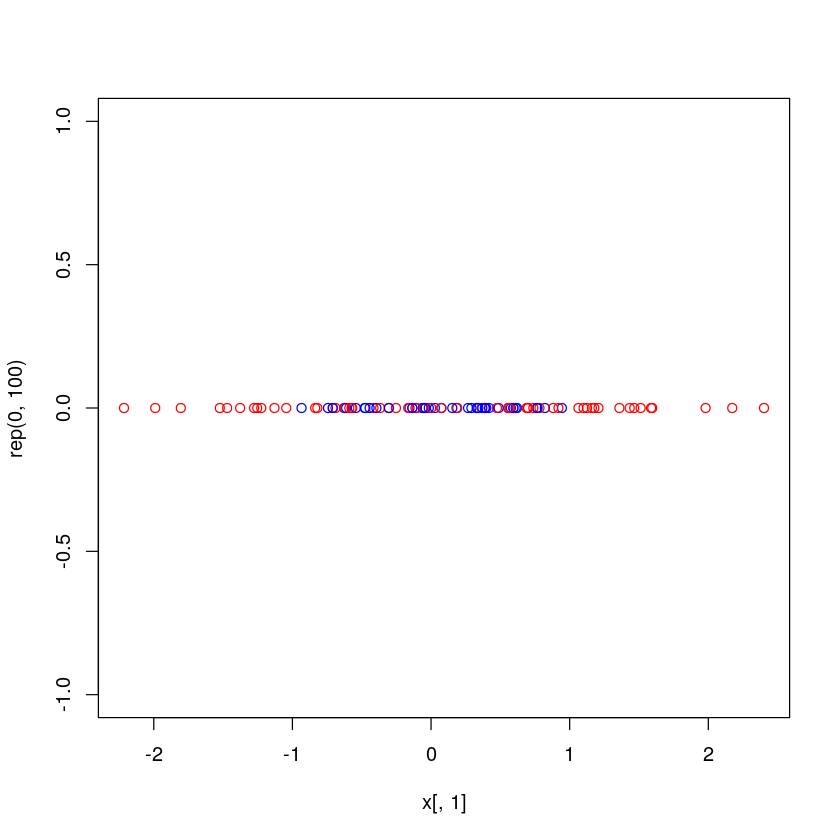

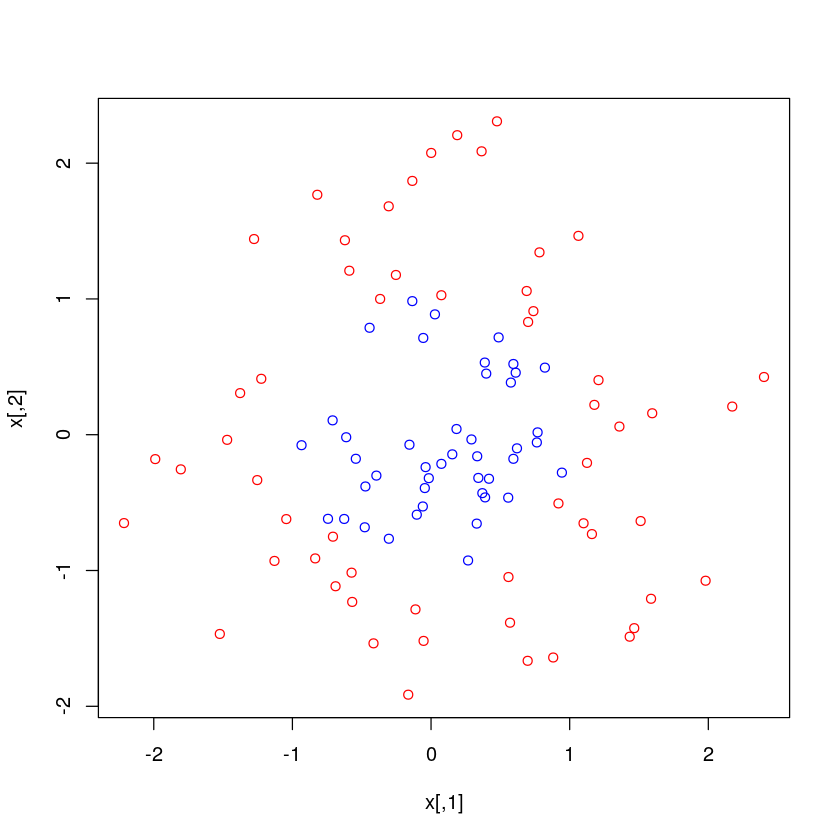

In [2]:
#RUN5
set.seed(1)
x=matrix(rnorm(100*2), ncol=2)
x1=apply(x,1,function(z) norm(z,"2"))
x.3d=cbind(x,x1)
y=ifelse(x1>1,1,-1)
plot(x[,1],rep(0,100), col=(3-y))
plot(x, col=(3-y))

Loading required namespace: rmarkdown


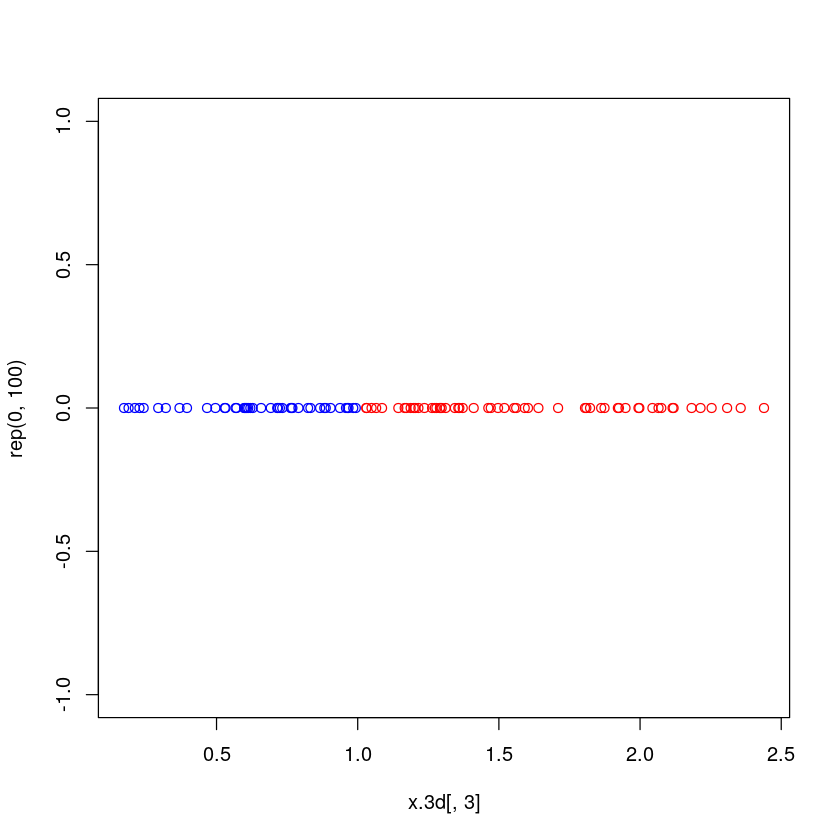

In [6]:
options(rgl.printRglwidget = TRUE)
plot3d(x.3d[,1], x.3d[,2],x.3d[,3], col=(3-y))
plot(x.3d[,3],rep(0,100), col=(3-y))


In [ ]:
# Train a linear SVM
svp <- ksvm(x,y,type="C-svc",kernel='vanilladot',C=100000,scaled=c())
# Visualize it
plot(svp,data=x)


# Train a nonlinear SVM
svp <- ksvm(x,y,type="C-svc",kernel='rbf',kpar=list(sigma=2),C=1000)
# Visualize it
plot(svp,data=x)


In [ ]:
################ 
#RUN6
n    <- 1000

# Training
x    <- cbind(runif(n),runif(n))
eta  <- x[,2] - sin(10*x[,1])
prob <- 1/(1+exp(-5*eta))
y    <- 2*rbinom(n,1,prob)-1

# Testing
xp   <- cbind(runif(n),runif(n))
eta  <- xp[,2] - sin(10*xp[,1])
prob <- 1/(1+exp(-5*eta))
yp   <- 2*rbinom(n,1,prob)-1

y  <- as.factor(y)
yp <- as.factor(yp)

plot(x,col=ifelse(y=="1",1,3),pch=19,main="Training data")
legend("topright",c("Y=1","Y=-1"),pch=19,col=c(1,3),inset=0.05,bg=gray(1),cex=1.5)

fit<-ksvm(x,y,kernel="rbfdot")

plot(fit,data=x)

SV <- x[alphaindex(fit)[[1]],]
plot(SV,pch=19,main="Locations of the support vectors")

